In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [2]:
file_name = "pick.csv"
with open(file_name) as f:
    content = f.readlines()

In [3]:
num_samples = int(len(content)/3)
print("Number of samples:", num_samples)

Number of samples: 826


In [4]:
character_lines = [content[i] for i in range(0, len(content), 3)]
ban_lines = [content[i] for i in range(1, len(content), 3)]
result_lines = [content[i] for i in range(2, len(content), 3)]

In [5]:
# Some of the ban lines are missing so we fill it with -1 (no ban)
for pos, line in enumerate(ban_lines):
    if line == "" or line == '\n':
        ban_lines[pos] = '-1, -1, -1, -1, -1, -1, -1, -1, -1, -1\n'

In [6]:
character_picks = np.asarray([str.split(line.replace("\n", ""), ",") for line in character_lines], dtype=int)
character_bans = np.asarray([str.split(line.replace("\n", ""), ",") for line in ban_lines], dtype=int)
labels = np.asarray([line[0:3]=="Win" for line in result_lines], dtype=bool)

assert character_picks.shape == character_bans.shape, [character_picks.shape, character_bans.shape]
assert character_bans.shape[0] == labels.shape[0], [character_bans.shape[0], labels.shape[0]]
assert character_bans.shape[1] == 10, character_bans.shape[1]

In [7]:
print("Unique character picks: %i" % len(np.unique(character_picks)))
print("Unique character bans: %i" % len(np.unique(character_bans)))
print("Win percentage by team 1: %s" % str(np.sum(labels)/labels.shape[0]))

Unique character picks: 137
Unique character bans: 125
Win percentage by team 1: 0.47699757869249393


In [8]:
character_frequency = Counter(list(character_picks.reshape(character_picks.shape[0]*character_picks.shape[1],)))
character_frequency.most_common()

[(18, 351),
 (81, 262),
 (498, 215),
 (164, 191),
 (110, 191),
 (24, 189),
 (40, 184),
 (41, 179),
 (12, 175),
 (13, 163),
 (201, 155),
 (113, 151),
 (497, 144),
 (92, 139),
 (3, 138),
 (150, 138),
 (121, 130),
 (76, 130),
 (51, 127),
 (154, 124),
 (8, 123),
 (421, 113),
 (112, 112),
 (64, 112),
 (107, 111),
 (117, 111),
 (163, 110),
 (14, 109),
 (72, 108),
 (4, 100),
 (114, 93),
 (268, 90),
 (223, 90),
 (429, 90),
 (59, 89),
 (44, 88),
 (142, 87),
 (42, 86),
 (412, 85),
 (126, 80),
 (236, 76),
 (19, 73),
 (267, 71),
 (98, 71),
 (96, 70),
 (43, 69),
 (245, 68),
 (67, 65),
 (63, 64),
 (157, 63),
 (61, 62),
 (25, 62),
 (222, 58),
 (432, 57),
 (38, 55),
 (50, 54),
 (16, 53),
 (516, 53),
 (119, 52),
 (26, 52),
 (29, 48),
 (15, 47),
 (69, 44),
 (20, 43),
 (136, 42),
 (53, 38),
 (141, 37),
 (105, 36),
 (27, 35),
 (45, 34),
 (28, 33),
 (57, 33),
 (55, 32),
 (39, 31),
 (131, 31),
 (90, 31),
 (7, 31),
 (84, 31),
 (161, 30),
 (79, 29),
 (99, 29),
 (54, 28),
 (30, 27),
 (91, 26),
 (101, 26),
 (23

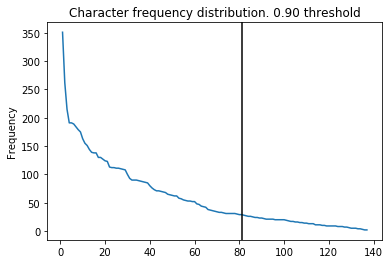

In [9]:
y = []
cummulative_freq = 0
total = character_picks.shape[0] * character_picks.shape[1]
counter = 0
threshold = 0.90
cut_for_threshold  = None
for key, freq in character_frequency.most_common():
    y.append(freq)
    cummulative_freq += freq
    counter += 1
    if cummulative_freq / total >= threshold and cut_for_threshold is None:
        cut_for_threshold = counter 
plt.plot(list(range(1, len(y)+1)), y)
plt.title("Character frequency distribution. %0.2f threshold" % threshold)
plt.ylabel("Frequency")
plt.axvline(x=cut_for_threshold, color='black')

    

In [10]:
ban_frequency = Counter(list(character_bans.reshape(character_bans.shape[0]*character_bans.shape[1],)))
ban_frequency.most_common()

[(-1, 1202),
 (142, 728),
 (121, 605),
 (164, 502),
 (41, 342),
 (8, 325),
 (72, 266),
 (12, 235),
 (117, 221),
 (84, 205),
 (268, 176),
 (3, 157),
 (96, 157),
 (19, 147),
 (28, 146),
 (92, 138),
 (18, 135),
 (13, 130),
 (113, 130),
 (20, 118),
 (40, 117),
 (223, 107),
 (154, 106),
 (76, 99),
 (107, 84),
 (38, 78),
 (126, 72),
 (498, 71),
 (24, 69),
 (110, 68),
 (55, 68),
 (136, 66),
 (157, 60),
 (53, 53),
 (266, 52),
 (67, 52),
 (201, 46),
 (81, 42),
 (63, 42),
 (50, 41),
 (119, 40),
 (14, 33),
 (516, 33),
 (27, 32),
 (90, 29),
 (412, 27),
 (421, 24),
 (150, 21),
 (4, 21),
 (238, 19),
 (497, 19),
 (51, 18),
 (59, 17),
 (112, 17),
 (89, 16),
 (429, 16),
 (245, 16),
 (17, 16),
 (114, 16),
 (69, 14),
 (80, 14),
 (44, 14),
 (91, 13),
 (23, 13),
 (16, 13),
 (35, 12),
 (64, 12),
 (29, 12),
 (163, 11),
 (54, 11),
 (31, 10),
 (34, 10),
 (161, 10),
 (131, 10),
 (9, 9),
 (105, 9),
 (427, 9),
 (25, 8),
 (122, 8),
 (32, 7),
 (432, 7),
 (75, 7),
 (98, 7),
 (236, 7),
 (106, 7),
 (61, 7),
 (42, 6),


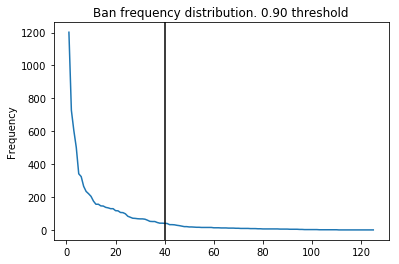

In [11]:
y = []
cummulative_freq = 0
counter = 0
threshold = 0.90
cut_for_threshold  = None
total = character_bans.shape[0] * character_bans.shape[1]
for key, freq in ban_frequency.most_common():
    y.append(freq)
    cummulative_freq += freq
    counter += 1
    if cummulative_freq / total >= threshold and cut_for_threshold is None:
        cut_for_threshold = counter 
plt.plot(list(range(1, len(y)+1)), y)
plt.title("Ban frequency distribution. %0.2f threshold" % threshold)
plt.ylabel("Frequency")
plt.axvline(x=cut_for_threshold, color='black')

In [12]:
def team2oneHot(char_picks, char_bans, char_id_to_feature_id, other_category_value=-1, include_bans=True):
    one_hot = np.zeros((1, len(char_id_to_feature_id.keys())))
    char_picks = list(char_picks)
    char_bans = list(char_bans)
    for char_id in char_picks:
        feature_id = char_id_to_feature_id.get(char_id, other_category_value)
        assert char_id == other_category_value or one_hot[0, feature_id] == 0, "feature id %i char id %i. Can't pick same character twice"%(feature_id, char_id)
        one_hot[0, feature_id] = 1
    if include_bans:
        for char_id in char_bans:
            feature_id = char_id_to_feature_id.get(char_id, other_category_value)
            assert char_id == other_category_value or one_hot[0, feature_id] == 0, "feature id %i char id %i. Cannot be picked and banned in the same team"%(feature_id, char_id)
            one_hot[0, feature_id] = -1
    return one_hot
        

In [13]:
# Convert character picks to one hot encoding
# It would be interesting to try word2vec encoding on the characters and picks, that way we might find closeness in team compositions
# I could have a set of one hot encoding per team, then we can encode the ban as a -1 in the same column as the pick

# Add special value for unseen categories
other_category_value = -1
possible_character_values = list(np.unique(character_picks))
assert other_category_value not in possible_character_values, "we want to use this as a special value"
possible_character_values.append(other_category_value) # We want to leave an extra category for unseen values. In this case it will match the no-ban category


# Create dictionary for mapping values
char_id_to_feature_id = {}
feature_id = 0
for char_id in possible_character_values:
    char_id_to_feature_id[char_id] = feature_id
    feature_id += 1
#TODO create reverse dictionary

# Split data into teams
team_a_picks = character_picks[:, 0:5]
team_b_picks = character_picks[:, 5:10]
team_a_bans = character_bans[:, 0:5]
team_b_bans = character_bans[:, 5:10]

# Placeholders for new data
num_features = len(possible_character_values)
team_a = np.zeros((num_samples, num_features))
team_b = np.zeros((num_samples, num_features))

for sample_id in range(num_samples):
    #try:
    team_a[sample_id, :] = team2oneHot(team_a_picks[sample_id], team_a_bans[sample_id], char_id_to_feature_id, other_category_value, include_bans=False)
    team_b[sample_id, :] = team2oneHot(team_b_picks[sample_id], team_b_bans[sample_id], char_id_to_feature_id, other_category_value, include_bans=False)
    #except(AssertionError):
    #    print("Sample id with assertion errors: ", sample_id)
data = np.hstack((team_a, team_b))

In [14]:
# Split data into train, valid, test sets
import random
import math
def split_data(data, y, split_values={'train':0.6, 'valid':0.2, 'test':0.2}):
    sample_ids = list(range(data.shape[0]))
    N = len(sample_ids)
    random.shuffle(sample_ids)
    train_limit = int(math.floor(N*split_values['train']))
    valid_limit = int(math.floor(N*(split_values['train'] + split_values['valid'])))
    test_limit = N
    train_data = np.asarray(data[0:train_limit])
    train_y = np.asarray(y[0:train_limit])
    valid_data = np.asarray(data[train_limit:valid_limit])
    valid_y = np.asarray(y[train_limit:valid_limit])
    test_data = np.asarray(data[valid_limit:test_limit])
    test_y = np.asarray(y[valid_limit:test_limit])
    assert train_data.shape[0] == train_y.shape[0]
    assert valid_data.shape[0] == valid_y.shape[0]
    assert test_data.shape[0] == test_y.shape[0]
    return [(train_data, train_y), (valid_data, valid_y), (test_data, test_y)]

In [28]:
(train_data, train_y), (valid_data, valid_y), (test_data, test_y) = split_data(data, labels)

In [29]:
# Augment dataset by inverting team order

inverted = np.hstack((train_data[:, int(train_data.shape[1]/2):], train_data[:, 0:int(train_data.shape[1]/2)]))
print(train_data.shape)
print(inverted.shape)
train_data = np.vstack((train_data, inverted))
assert train_data.shape[0] == 2*inverted.shape[0]
assert train_data.shape[1] == inverted.shape[1]

inverted_y = ~train_y
train_y = np.hstack((train_y, inverted_y))
print(train_y.shape)
assert 2*inverted_y.shape[0] == train_y.shape[0]


(495, 276)
(495, 276)
(990,)


In [30]:
# Train logisitic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l1')
model.fit(train_data, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
# Evaluate performance
predictions = model.predict(train_data)
accuracy = np.sum(predictions == train_y) / train_y.shape[0]
print("Train Accuracy: ", accuracy)

predictions = model.predict(valid_data)
accuracy = np.sum(predictions == valid_y) / valid_y.shape[0]
print("Valid Accuracy: ", accuracy)

Train Accuracy:  0.6989898989898989
Valid Accuracy:  0.5151515151515151


In [32]:
# Check weights to see most important features
weights = model.coef_
print(weights.shape)
team_a_w = weights[0, 0:int(weights.shape[1]/2)]
team_b_w = weights[0, int(weights.shape[1]/2):]

most_important_a = []
for pos, value in enumerate(team_a_w):
    if abs(value) > 0.9:
        most_important_a.append(pos)
print(most_important_a)
        
most_important_b = []
for pos, value in enumerate(team_b_w):
    if abs(value) > 0.9:
        most_important_b.append(pos)
print(most_important_b)

(1, 276)
[10, 20, 29, 44, 95]
[10, 20, 29, 44, 95]


In [ ]:
# Try shared weights
# For character type, just include extra features that refer to the composition.
#